# Exploratory Data Analysis (EDA) of a Pruvo dataset.

## Instructions:
Let me share with you a sample of the data we do have on our end and let me know what you think.

During the last years we were collecting a lot of human decisions regarding the relations of 2 room types.

In the following excel: https://docs.google.com/spreadsheets/d/1AjDaqnXrZFy3KAspjUAVo5cLt37MEVXOuBooYDM9Kr8/edit?usp=sharing

You can see the decisions made between the original room type (Col A) and the proposed one (Col B).

Links = how many times a person clicked that both rooms in A and B are the same (if it is higher than 6 it means someone put a "force" match decision – this is the admin 1000 score you see)

Unlinks = how many times someone decided it is not a match (different room type)

Score = links – unlinks + admin

I think we have a few millions of rows like that (of course that there are mistakes there as it was a human decision)

Let me know what you think…

## Initial Reflections, Implicit/Explicit Relations & Assumptions
It seems that in the dataset I'm about to analyse there are 2 columns (A & B), A being the original, B being the one proposed by Pruvo, then a third column called "Links" that scores how well column A & B are related by, and this is ambiguous: "how many times a person clicked that both rooms [columns] are the same", which I'm taking it to mean that several individuals, each one time, indicated that these columns (A & B) either refer in fact to the same room, or that they do not by selecting to unlink, which is represented by the next column.

Also to note that if the the number in the "Links" column is higher than 6 (was it meant "6 or higher"?), then someone "put a force match decision", being accompanied by a final column called "admin" with the value of 1_000, which I'm taking to mean that someone forcibly marked Col A & B has being the same.

These assumptions being correct, I'd hypothesize that this is a synthetic dataset, in the sense that it was generated to create an algorithm, where 6 evaluators looked at each datapoint couple of column A & B, and in a binary selection indicated whether they're referring to the same object, in this case hotel room, or not, with 6 being the higher degree of agreement between the 6 evaluators (they all agree it's the same room) and 0 the lowest (they all agree it's a different room), or something in between.

At the same time, with this assumption, the admin score should refer to an overseer that knows if the two columns refer to the same room or not and has entered a number higher than 6 on the links and 1_000 on the admin to control that indeed there's no mistake in the data. This would be a somewhat standard way of establishing a human-level performance (or technically speaking a Bayes Error Rate) that could be useful to establish an expectation of the algorithm performance (but at this moment doesn't seem to make much sense).

This Hypothesis makes in fact little sense, has the score wouldn't require the deduction of the unlinks from the links to reflect it's confidence, and the adding of the admin score to 1_000 (assuming there's no other value in said column) would massively bias the confidence score of any algorithm I can think of the top of my head, has anything with a score that not even close to 1_000 would be considered awful by the algorithm, 'though a score of 1_001 would be almost as good as a score of 6 (with my assumption), but the algorithm would become so biased it should reject that score.

I'll need to look at the data and try to make more sense out of this.

## Initial Plan
Before even having loaded the data, the plan passes by loading the data, doing an EDA on the data, clarifying any doubts I might have (including the doubts above) and moving on from there.

### Libraries

In [3]:
# standard libraries


# 3rd party libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import local scripts


# required activations
%matplotlib inline
sns.set(color_codes = True)

In [5]:
# loading the ds
rooms_df = pd.read_csv("results-20230717-113545 - results-20230717-113545.csv")

rooms_df

,name1,name2,type,score,admin,links,unlinks
0,twin room,"twin room, 2 twin beds",match,1963,1000,7,44
1,queen room with two queen beds,2 queen beds non-smoking,match,1004,1000,10,6
2,standard room with twin beds non refundable,twin room,match,999,1000,5,6
3,double room,room 1 double bed non smoking fullbed*,match,997,1000,5,8
4,"traditional room, 2 queen beds",queen room with two queen beds,match,995,1000,1,6
...,...,...,...,...,...,...,...
995,triple room with bathroom,quadruple room with bathroom,match,-1008,-1000,0,8
996,premier king harbor view room,the club room king city view (3 persons),match,-1023,-1000,0,23
997,premier king sky view,premier king harbor view room,match,-1023,-1000,0,23
998,premier king harbor view room,premier king sky view,match,-1023,-1000,0,23


In [8]:
# checking extended head of the DF
rooms_df.head(20)

,name1,name2,type,score,admin,links,unlinks
0,twin room,"twin room, 2 twin beds",match,1963,1000,7,44
1,queen room with two queen beds,2 queen beds non-smoking,match,1004,1000,10,6
2,standard room with twin beds non refundable,twin room,match,999,1000,5,6
3,double room,room 1 double bed non smoking fullbed*,match,997,1000,5,8
4,"traditional room, 2 queen beds",queen room with two queen beds,match,995,1000,1,6
5,double room,"standard double room, 1 queen bed",match,994,1000,6,12
6,standard double or twin,double room,match,991,1000,2,11
7,twin room,"habitación, 2 camas individuales",match,981,1000,7,26
8,classic triple room,habitación triple clásica,match,968,1000,7,39
9,grand suite,suite grand,match,957,1000,1,44


In [9]:
# checking extended tail of the DF
rooms_df.tail(20)

,name1,name2,type,score,admin,links,unlinks
980,habitación doble,room,match,-47,0,35,82
981,double classic,classic,match,-48,-1000,51,99
982,double city view,double room,match,-49,0,3,52
983,twin/double room - premium,twin room,match,-49,0,0,49
984,double queen size bed,twin room,match,-54,0,0,54
985,double pool view,double room - pool view,match,-55,0,4,59
986,room - pool view,twin/double room - pool view,match,-56,0,6,62
987,habitación doble,habitación con 2 camas individuales,match,-64,0,6,70
988,double room,deluxe suite,match,-65,0,1,66
989,double room,double room king bed - de luxe,match,-91,0,0,91


In [10]:
# checking full descriptive stats
rooms_df.describe(include= "all")

,name1,name2,type,score,admin,links,unlinks
count,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.00000
unique,667,694,2,NaN,NaN,NaN,NaN
top,double room,double room,match,NaN,NaN,NaN,NaN
freq,71,66,975,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-4.803000,5.000000,1.265000,12.06800
std,NaN,NaN,NaN,148.822668,130.353335,5.712916,20.38045
min,NaN,NaN,NaN,-2006.000000,-1000.000000,0.000000,6.00000
25%,NaN,NaN,NaN,-10.000000,0.000000,0.000000,6.00000
50%,NaN,NaN,NaN,-7.000000,0.000000,0.000000,8.00000
75%,NaN,NaN,NaN,-6.000000,0.000000,0.000000,11.00000


### Notes I
Straight away it becomes clear that the hypothesis indeed makes no sense (it had some assumptions definitely wrong as well).

In [13]:
# checking the cols data types
rooms_df.dtypes

name1      object
name2      object
type       object
score       int64
admin       int64
links       int64
unlinks     int64
dtype: object

array([[<Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'admin'}>],
       [<Axes: title={'center': 'links'}>,
        <Axes: title={'center': 'unlinks'}>]], dtype=object)

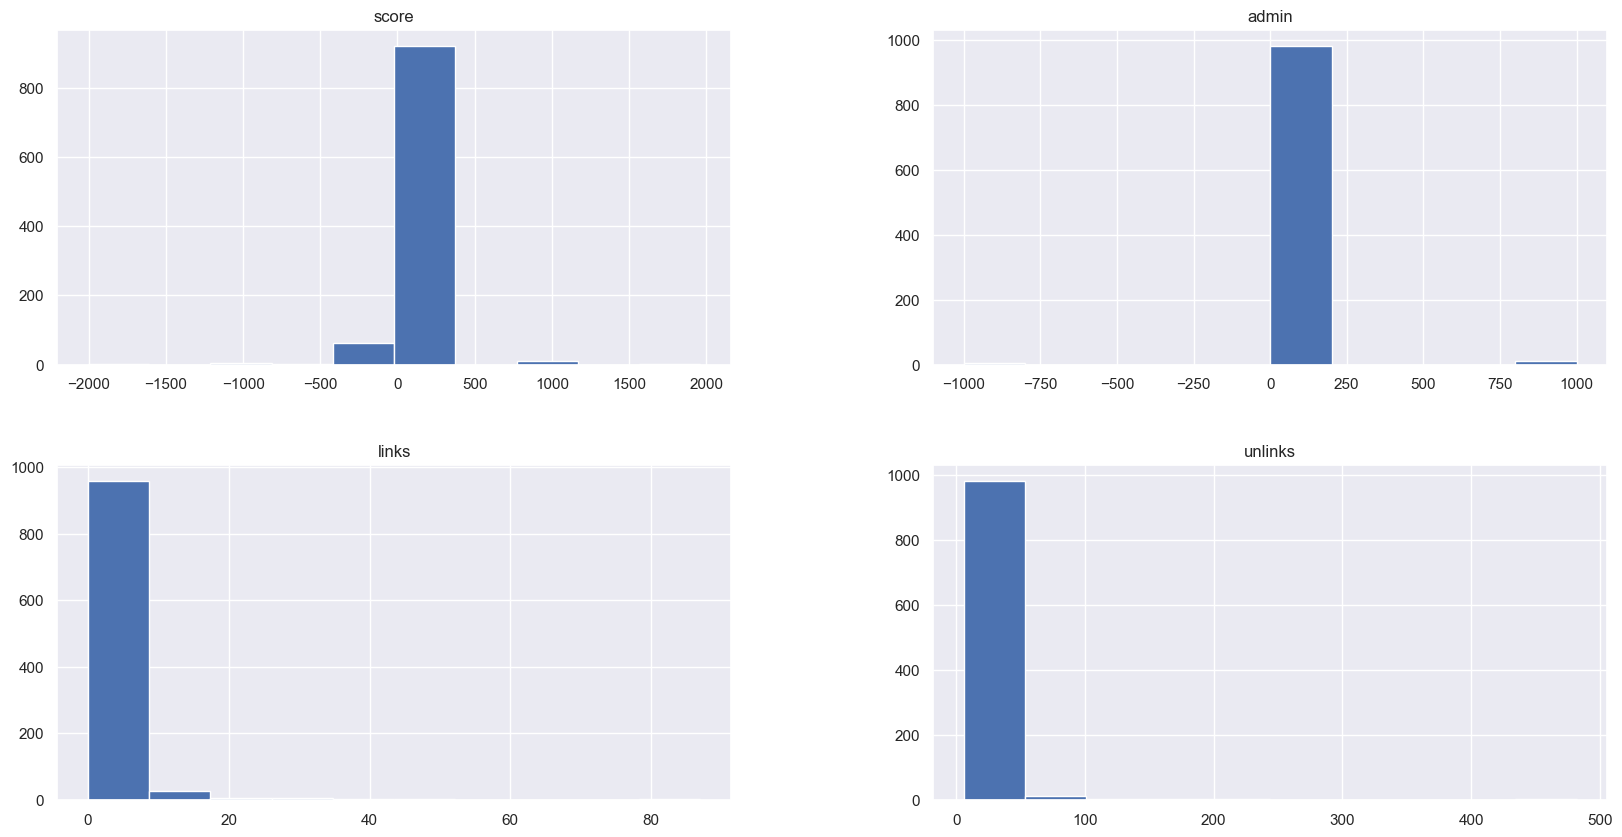

In [16]:
# plotting histograms of the variables
rooms_df.hist(figsize= (20, 10))

<Axes: xlabel='admin', ylabel='score'>

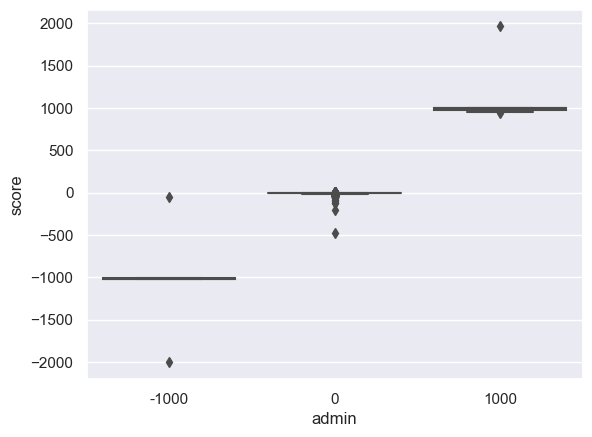

In [22]:
# plotting box plot to viz the relationship between score & admin
sns.boxplot(x= "admin", y= "score", data= rooms_df)

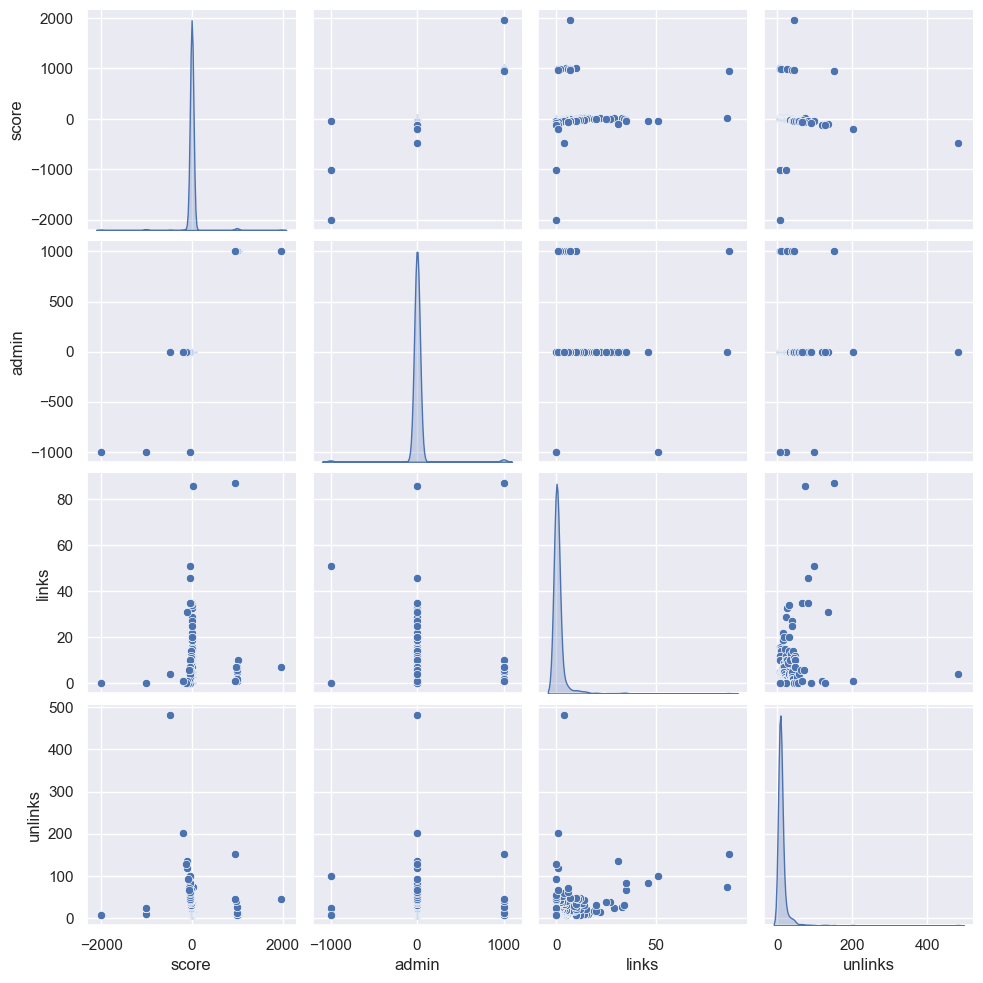

In [25]:
# building pairplot
sns.pairplot(rooms_df, diag_kind= "kde")